In [13]:
# Import Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as split_data
import math


In [14]:
# Load Dataset
df = pd.read_csv('cocomo.csv')
df.shape

(63, 18)

In [15]:
df.head()

,id,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,1,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,2,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,3,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,4,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,5,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


In [16]:
data=df.drop(['id'],axis=1)
data.shape

(63, 17)

In [17]:
X=data.drop(['actual'],axis=1)
y=data['actual']
print(X)
print(y)

    rely  data  cplx  time  stor  virt  turn  acap  aexp  pcap  vexp  lexp  \
0   0.88  1.16  0.70  1.00  1.06  1.15  1.07  1.19  1.13  1.17  1.10  1.00   
1   0.88  1.16  0.85  1.00  1.06  1.00  1.07  1.00  0.91  1.00  0.90  0.95   
2   1.00  1.16  0.85  1.00  1.00  0.87  0.94  0.86  0.82  0.86  0.90  0.95   
3   0.75  1.16  0.70  1.00  1.00  0.87  1.00  1.19  0.91  1.42  1.00  0.95   
4   0.88  0.94  1.00  1.00  1.00  0.87  1.00  1.00  1.00  0.86  0.90  0.95   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
58  1.00  0.94  1.15  1.06  1.06  1.00  0.87  1.00  1.00  1.00  1.00  1.00   
59  1.15  0.94  1.30  1.11  1.06  1.00  1.00  0.86  1.13  0.86  1.10  1.07   
60  1.00  0.94  1.15  1.00  1.00  0.87  0.87  0.86  1.00  0.86  0.90  1.00   
61  0.88  0.94  1.30  1.11  1.21  1.15  1.00  0.78  0.82  0.70  1.21  1.14   
62  1.00  0.94  1.15  1.00  1.00  1.00  0.87  0.71  0.82  0.86  1.00  1.00   

    modp  tool  sced    loc  
0   1.24  1.10  1.04  113.0  
1  

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((44, 16), (44,), (19, 16), (19,))

<AxesSubplot:>

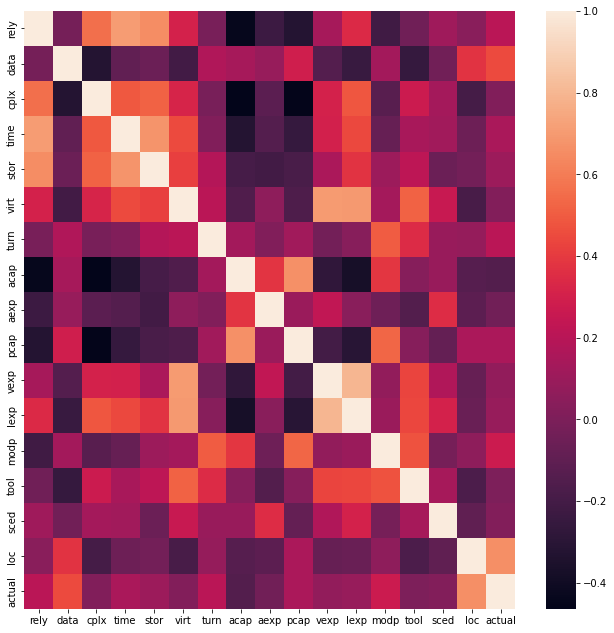

In [19]:
# Visualize Correlated Features
# corr = X_train.corr()
corr=data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

## Brute Force Method to find Correlated Features

In [20]:
from pandas.core.indexes.multi import names_compat
# Brute Force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    # for i in range(len(corr_mat.columns)):
    #     for j in range(i):
    #         if (abs(corr_mat.iloc[i,j]) > threshold):
    #             colname = corr_mat.columns[i]
    #             col_corr.add(colname)
    n=len(corr_mat.columns)
    # print(corr_mat)
    corr_features=set()
    features=[]
    for i in range(n-1):
        if(abs(corr_mat.iloc[i,n-1])>threshold):
            colname = corr_mat.columns[i]
            corr_features.add(colname)
            features.append(i)
    return corr_features,features

In [21]:
correlated_features,features = correlation(data=data, threshold=0.1)
print(len(set(correlated_features)))
print(correlated_features)
print(features)

9
{'modp', 'acap', 'loc', 'time', 'data', 'stor', 'turn', 'rely', 'pcap'}
[0, 1, 3, 4, 6, 7, 9, 12, 15]


In [22]:
x_data=X.iloc[:, features].values
y_data=y

# Linear Regression 
x_train, x_test, y_train, y_test = split_data( x_data, y_data, test_size = 1/4, random_state = 80, shuffle=True) 
regressor = LinearRegression()
regressor = regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Root Mean Sqaured Error
MSE = np.square(np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error :",RMSE)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean()
print(f'MAE error is {error}')

Root Mean Squared Error : 0.8492876224302769
MAE error is 0.0033285700867104195


In [25]:
# SVM
from sklearn.model_selection import train_test_split as split_data
X_train, X_test, Y_train, Y_test = split_data(x_data, y_data , test_size = 0.2 , shuffle=True)

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
svr=SVR() 
svr.fit(X_train,Y_train)
Y_pred=svr.predict(X_test)

#Root Mean Squared Error
MSE = np.square(np.subtract(Y_test,Y_pred)/np.maximum(np.absolute(Y_test),np.absolute(Y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(Y_test,Y_pred)/np.maximum(np.absolute(Y_test),np.absolute(Y_pred))).mean()
print(f'MAE error is {error}')

Root Mean Square Error:

0.803388855373869
MAE error is 0.12915006762756398


In [24]:
# Random Forest
from sklearn.model_selection import train_test_split as split_data
x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size=0.20, shuffle=True)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
treeModel = DecisionTreeRegressor(max_depth=5, random_state=None)
treeModel.fit(x_train, y_train)
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=50, criterion="absolute_error")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean()
print(f'MAE error is {error}')

# Root Mean Squared Error
MSE = np.square(np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(RMSE)

MAE error is -0.388054275349506
Root Mean Square Error:
0.6150830116912969
